<a href="https://colab.research.google.com/github/CasCard/OpenCV-Tutorial/blob/main/OpenCV_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
# importing OpenCV module
import cv2
from google.colab.patches import cv2_imshow

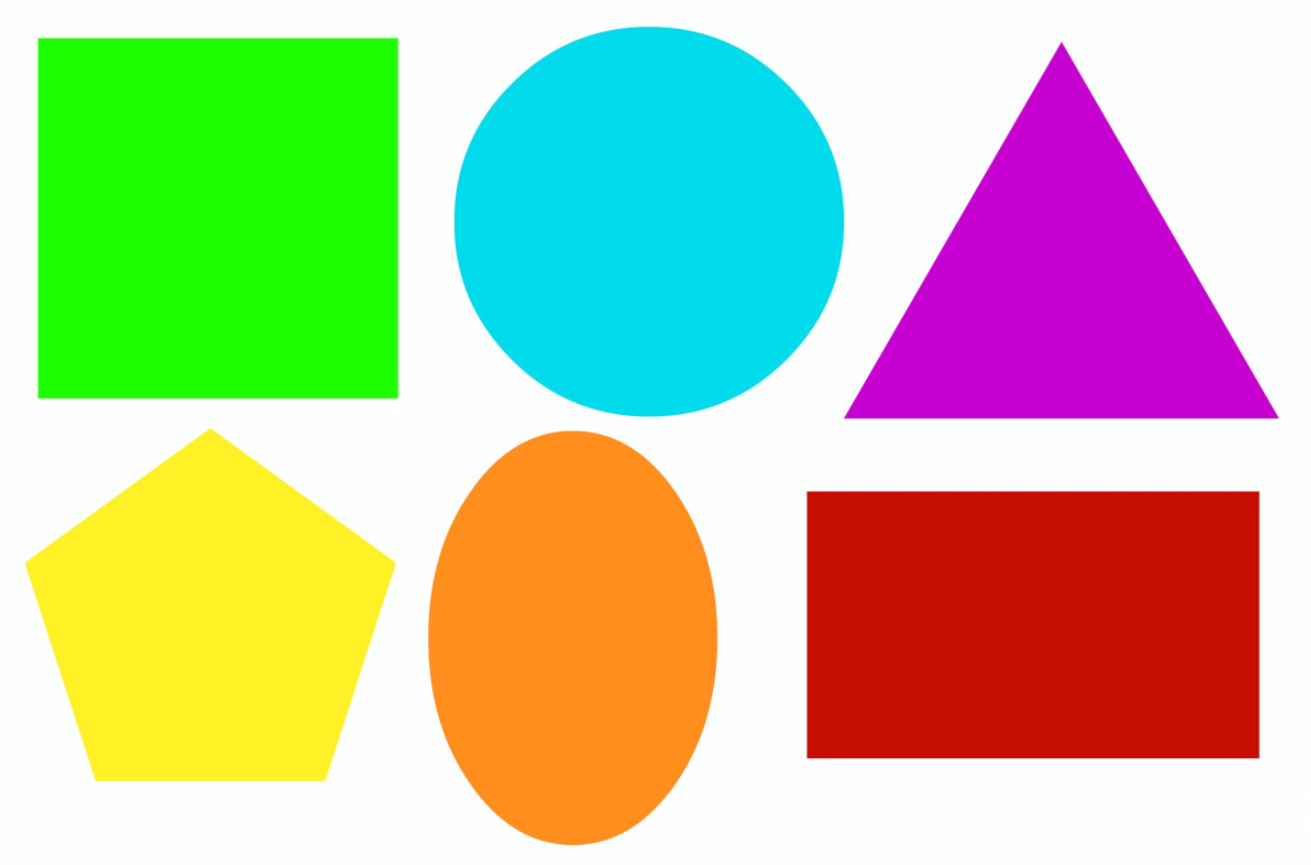

In [132]:
# loading an image in opencv

# Syntax: cv2.imread(path, flag)

# Parameters:
# path: A string representing the path of the image to be read.
# flag: way in which image should be read. It’s default value is cv2.IMREAD_COLOR

img_shapes = cv2.imread('/content/shapes.png')

cv2_imshow(img_shapes)

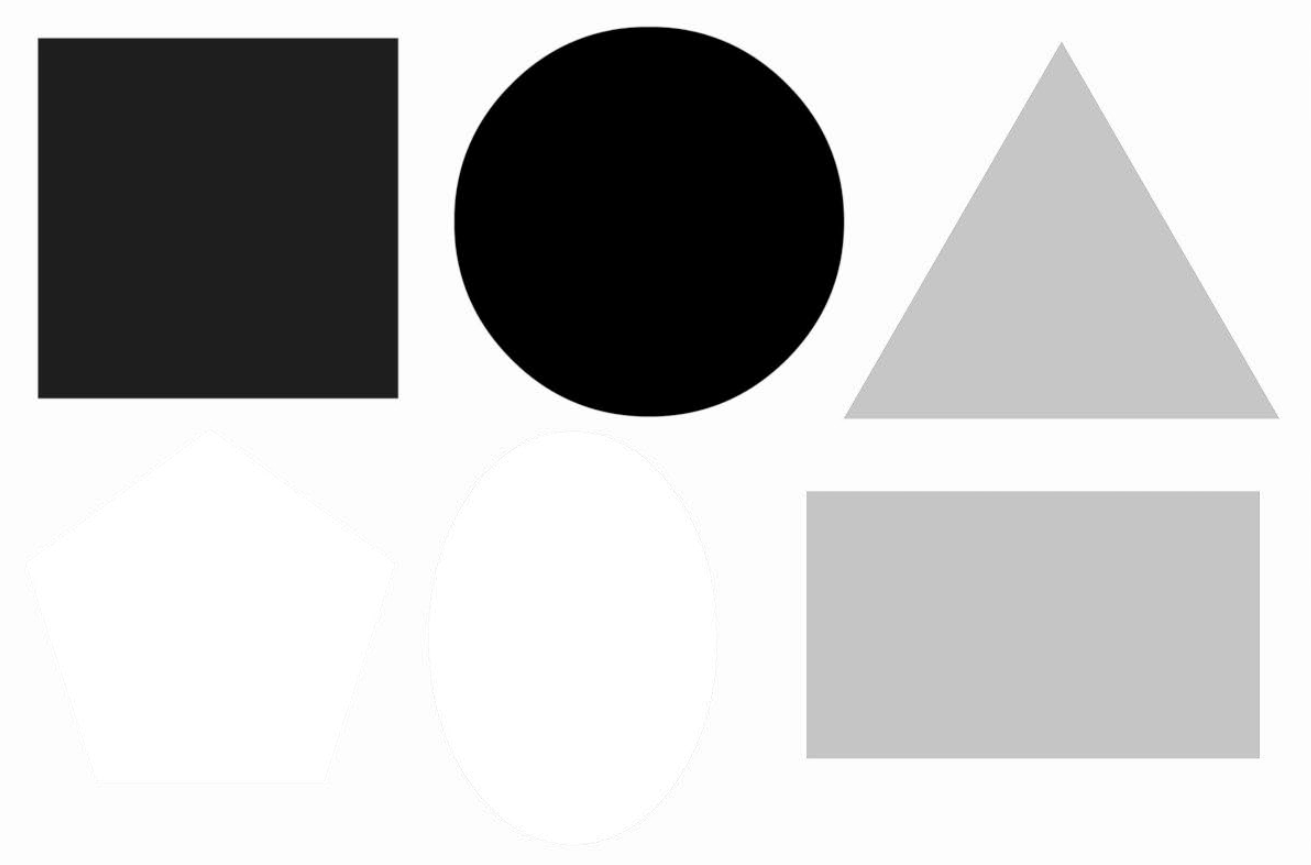

In [133]:
b,g,r = cv2.split(img_shapes)
cv2_imshow(r)

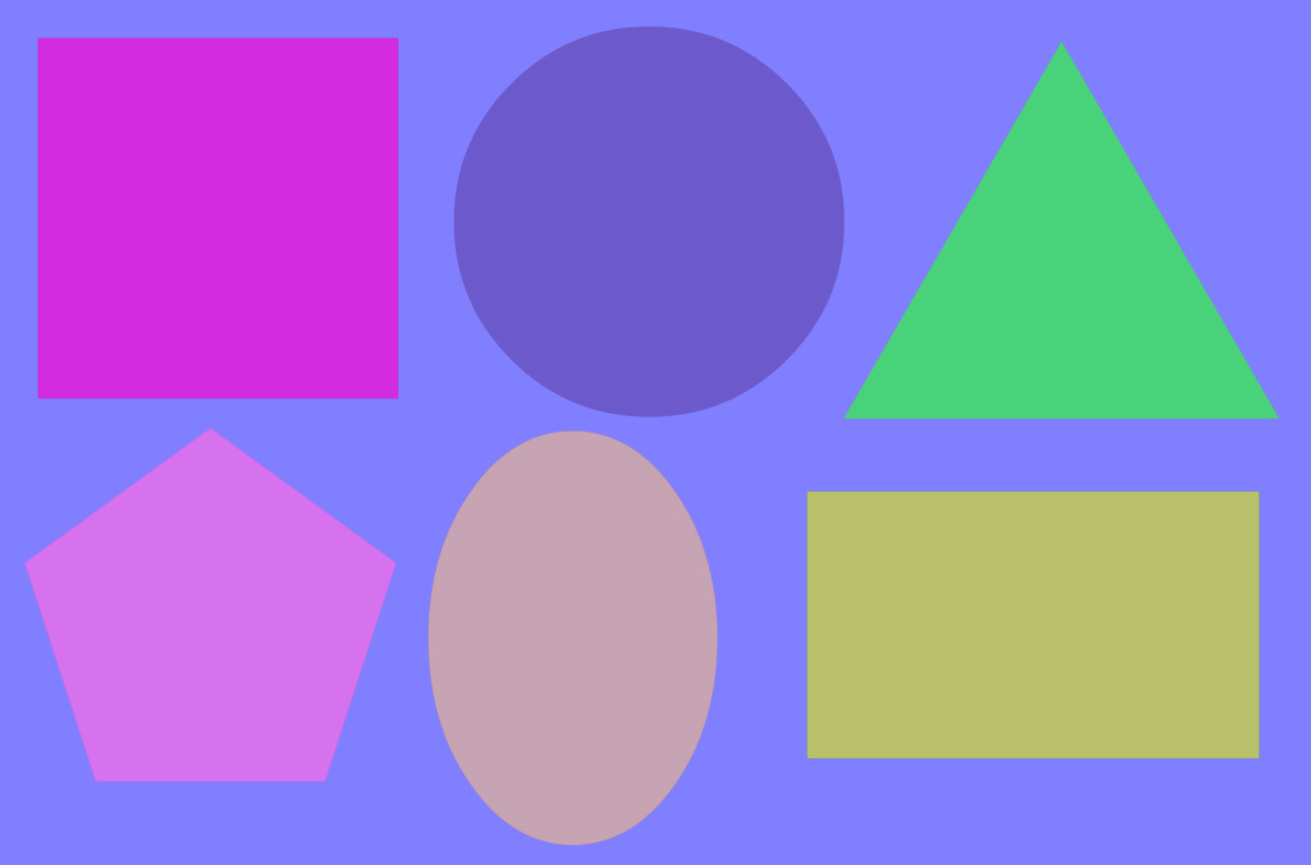

In [134]:
# Syntax: cv2.cvtColor(src, code[, dst[, dstCn]])

# Parameters:
# src: It is the image whose color space is to be changed.
# code: It is the color space conversion code.

# dst: It is the output image of the same size and depth as src image. It is an optional parameter.
# dstCn: It is the number of channels in the destination image.

lab_image = cv2.cvtColor(img_shapes, cv2.COLOR_BGR2LAB)
cv2_imshow(lab_image)

In [135]:
l_channel,a_channel,b_channel = cv2.split(lab_image)

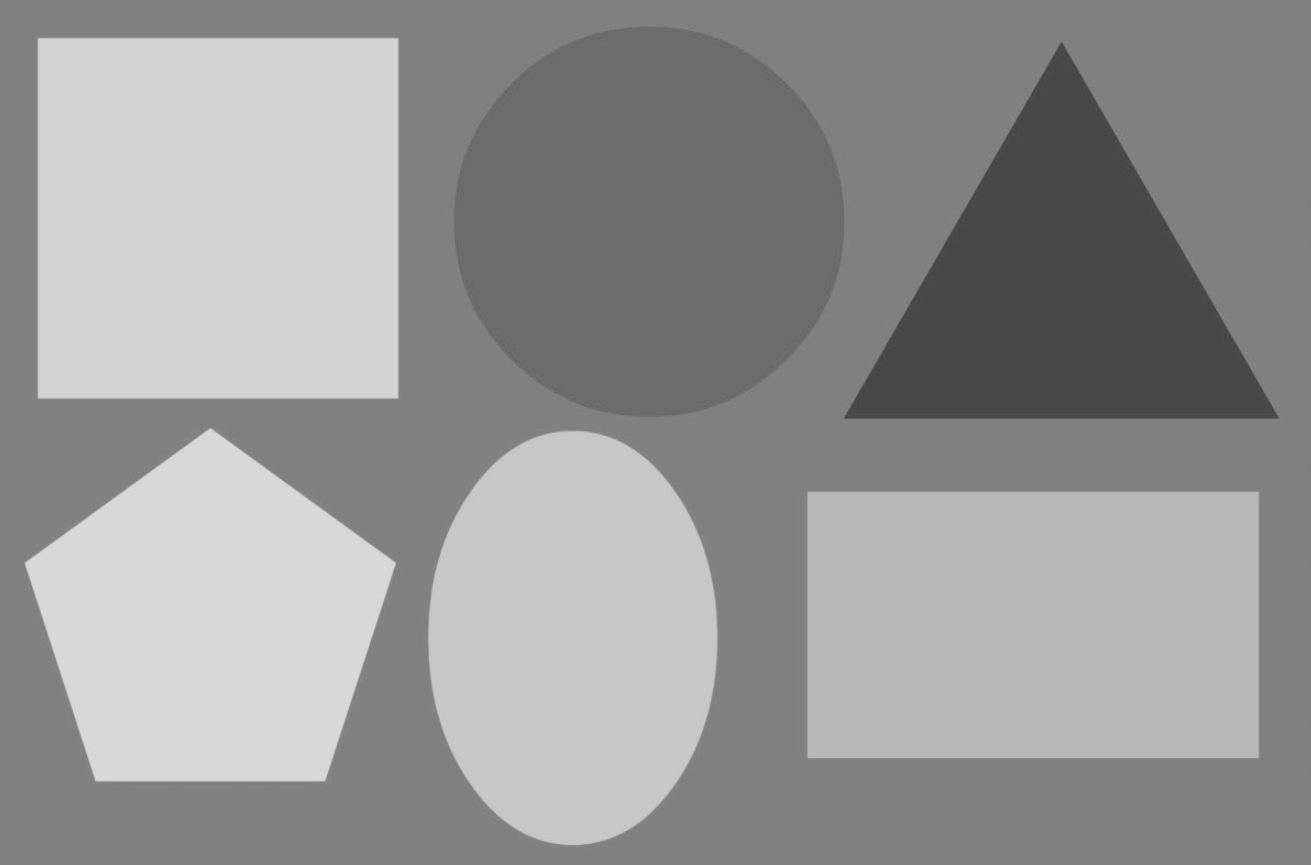

In [136]:
cv2_imshow(b_channel)

In [137]:
img_flower = cv2.imread('/content/flower.jpg')

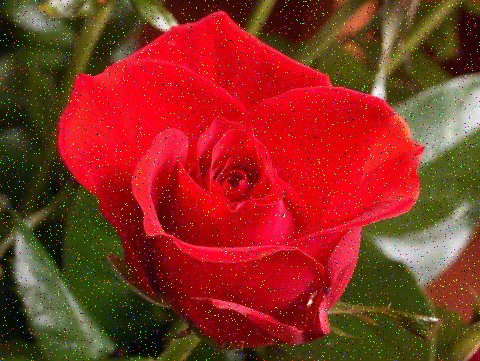

In [138]:
cv2_imshow(img_flower)

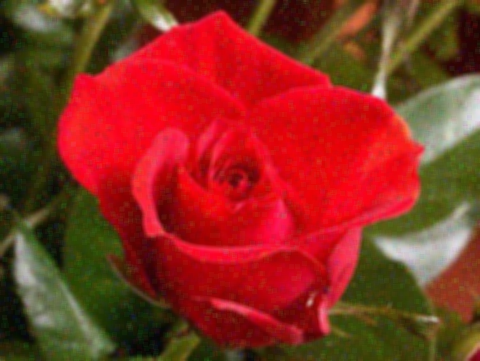

In [139]:
# Averaging Opencv

# Syntax: cv2.blur(src, ksize[, dst[, anchor[, borderType]]])
# Parameters:
# src: It is the image whose is to be blurred.
# ksize: A tuple representing the blurring kernel size.

avg_blur = cv2.blur(img_flower,(5,5))
cv2_imshow(avg_blur)

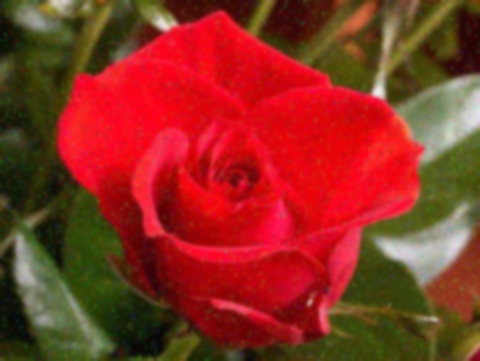

In [140]:
# Syntax: cv2.GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType=BORDER_DEFAULT]]] )

# src   :input image
# ksize :Gaussian Kernel Size. [height width]. height and width should be odd and can have different values. 
#        If ksize is set to [0 0], then ksize is computed from sigma values.

gaussian_blur = cv2.GaussianBlur(img_flower,(9,9),0)
cv2_imshow(gaussian_blur)

In [141]:
gaussian_blur = cv2.GaussianBlur(img_shapes,(9,9),0)

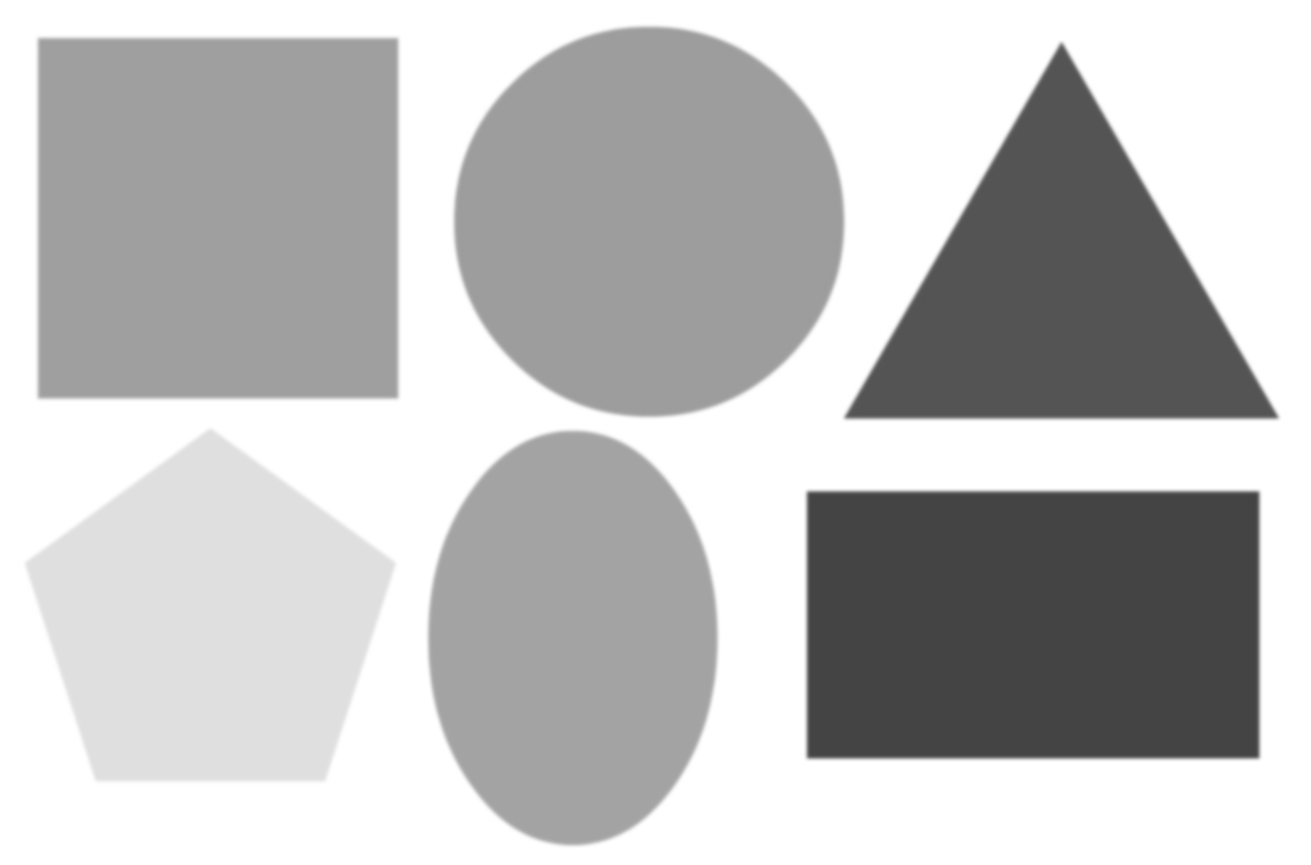

In [142]:
imgray = cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2GRAY)
cv2_imshow(imgray)

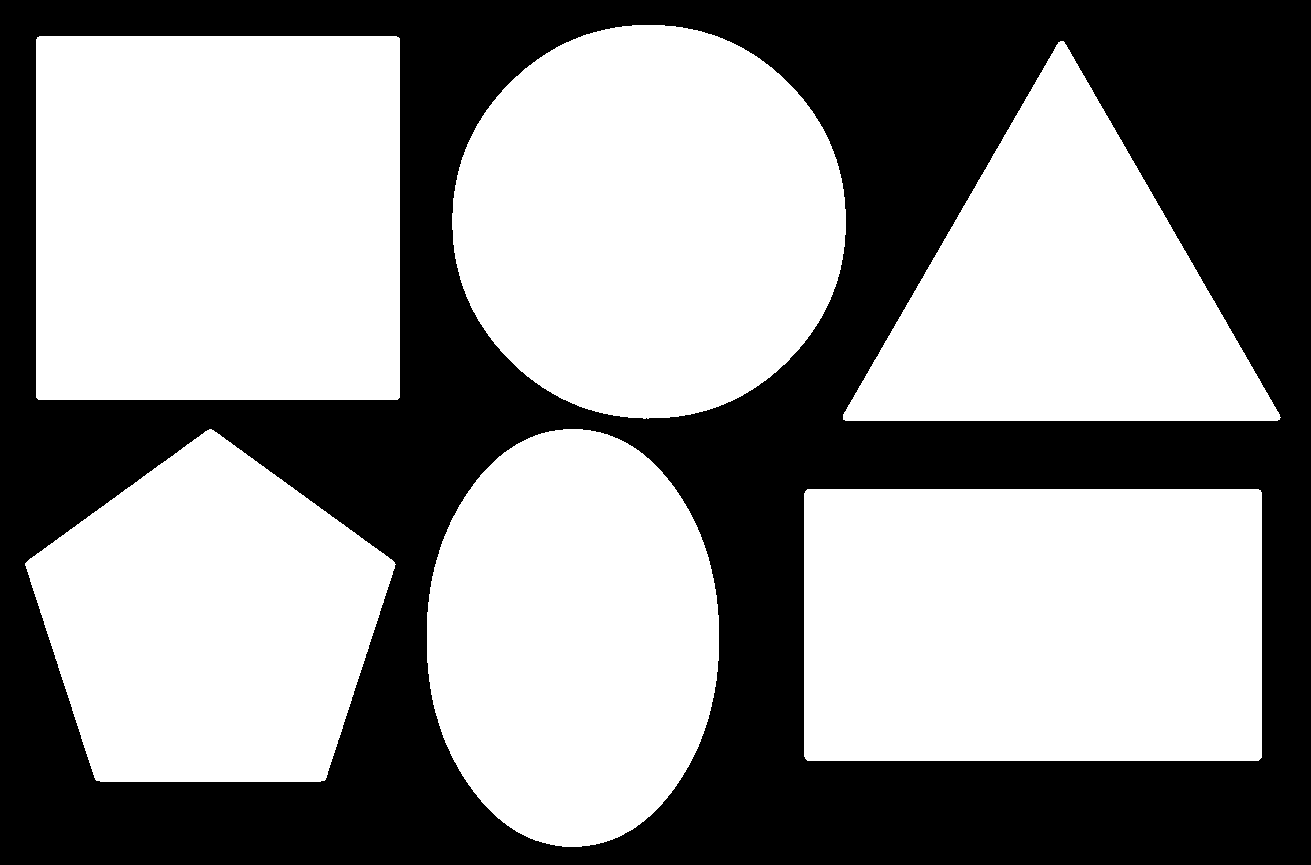

In [143]:

ret, thresh = cv2.threshold(imgray, 240, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(thresh)

In [144]:
#  First one is source image, 
#  second is contour retrieval mode, 
#  third is contour approximation method. 
#  And it outputs the contours and hierarchy.
#  Contours is a Python list of all the contours in the image.

# cv2.CHAIN_APPROX_NONE, all the boundary points are stored
# cv2.CHAIN_APPROX_SIMPLE removes all redundant points and compresses the contour

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [145]:
# To draw all contours, pass -1
cv2.drawContours(img_shapes, contours, -1, (127,255,0), 3)

array([[[254, 255, 253],
        [254, 255, 253],
        [254, 255, 253],
        ...,
        [254, 255, 253],
        [254, 255, 253],
        [254, 255, 253]],

       [[254, 255, 253],
        [254, 255, 253],
        [254, 255, 253],
        ...,
        [254, 255, 253],
        [254, 255, 253],
        [254, 255, 253]],

       [[254, 255, 253],
        [254, 255, 253],
        [254, 255, 253],
        ...,
        [254, 255, 253],
        [254, 255, 253],
        [254, 255, 253]],

       ...,

       [[254, 255, 253],
        [254, 255, 253],
        [254, 255, 253],
        ...,
        [254, 255, 253],
        [254, 255, 253],
        [254, 255, 253]],

       [[254, 255, 253],
        [254, 255, 253],
        [254, 255, 253],
        ...,
        [254, 255, 253],
        [254, 255, 253],
        [254, 255, 253]],

       [[254, 255, 253],
        [254, 255, 253],
        [254, 255, 253],
        ...,
        [254, 255, 253],
        [254, 255, 253],
        [254, 255, 253]]

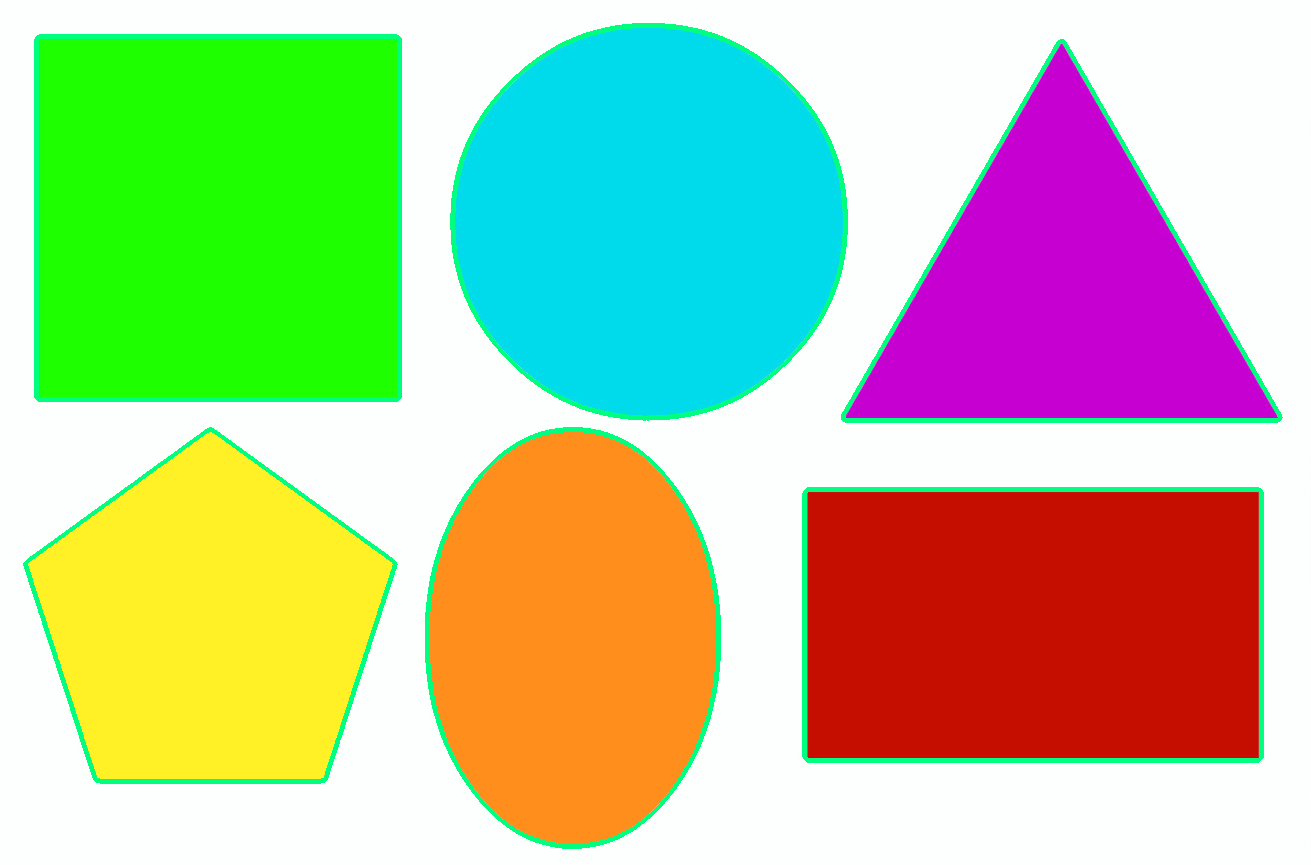

In [146]:
cv2_imshow(img_shapes)

In [147]:
img_shapes.shape

(865, 1311, 3)

In [148]:
for cnt in contours:
        area = cv2.contourArea(cnt)
        perimeter = cv2.arcLength(cnt, True)
        coordinates = cv2.approxPolyDP(cnt, 0.02 * perimeter, True)
        M = cv2.moments(cnt)
        # Get the corner approximation of figure
        obj_cor = len(coordinates)
        # Classify them based on number of corners
        if obj_cor == 3:
            object_type = "Triangle"
        elif obj_cor == 4:
            # If corner is four multiple possibility , so get the right one
            object_type = "Quad"
        elif obj_cor == 5:
            object_type = "Pentagon"
        elif obj_cor == 6:
            object_type = "Hexagon"
        else:
            object_type = "Circle"
    
	      
        # Get the centroid of the figure using Hue moments
        x_c = int(M['m10'] / M['m00'])
        y_c = int(M['m01'] / M['m00'])
        cv2.circle(img_shapes, (x_c, y_c), 7, (0, 0, 0), -1)
        cv2.putText(img_shapes,object_type,(x_c - 20, y_c - 20),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
       
        print(object_type,x_c,y_c)

Quad 1032 624
Circle 572 637
Pentagon 209 622
Triangle 1061 292
Quad 217 217
Circle 648 221


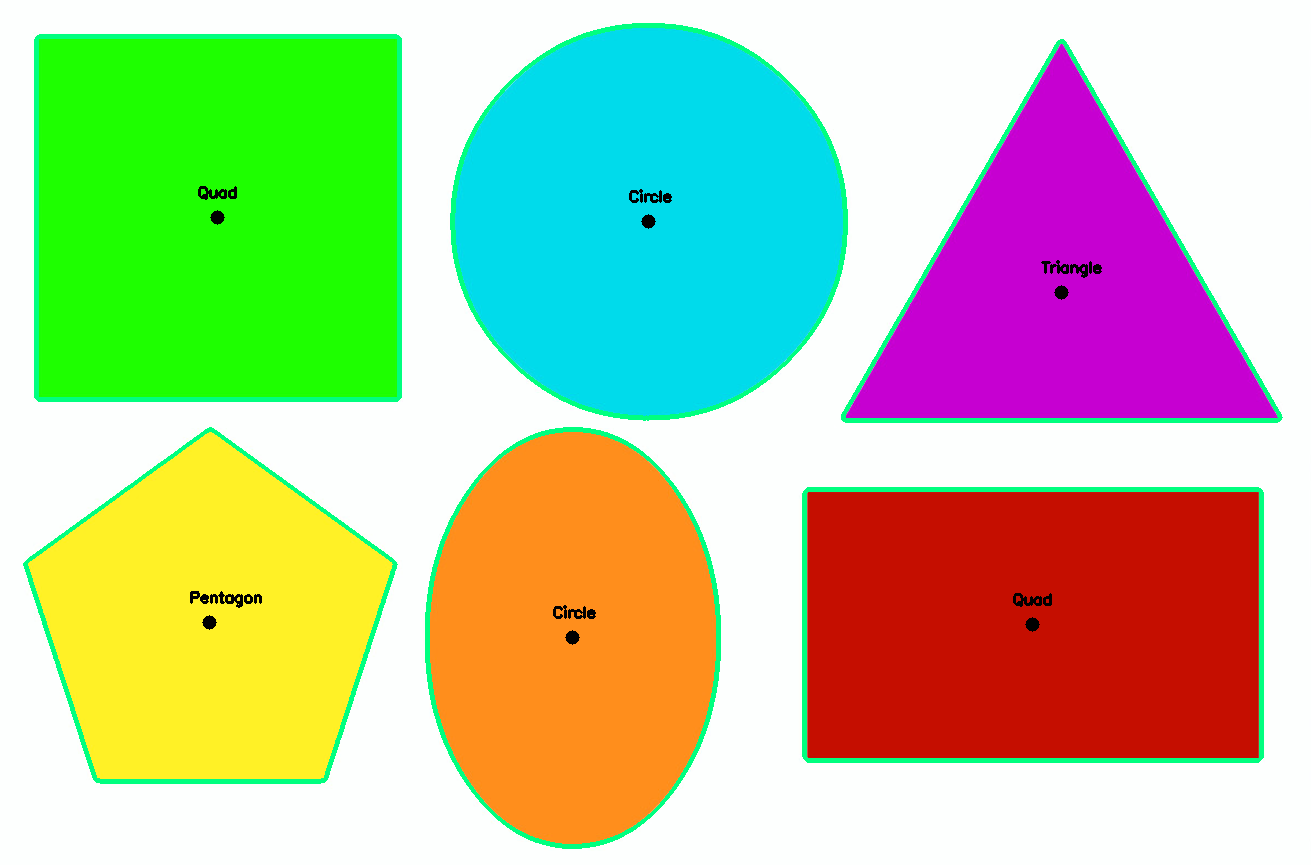

In [149]:
cv2_imshow(img_shapes)

(328, 400, 3)
(667, 1000, 3)
(400, 328)


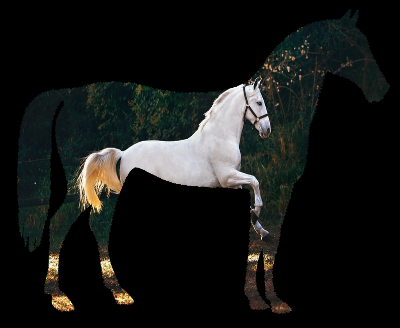

In [150]:
src1 = cv2.imread('/content/horse.png')
src2 = cv2.imread('/content/horse_real.jpg')
print(src1.shape)
print(src2.shape)
src2 = cv2.resize(src2, src1.shape[1::-1])

print(src1.shape[1::-1])
dst = cv2.bitwise_and(src1, src2)

cv2_imshow(dst)

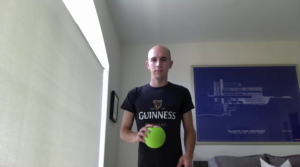

In [151]:
ball_track=cv2.imread("/content/ball-track.png")
test=ball_track.copy()
cv2_imshow(ball_track)

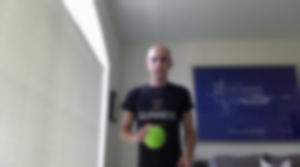

In [152]:
gaussian_blur= cv2.GaussianBlur(ball_track, (11, 11), 0)
cv2_imshow(gaussian_blur)

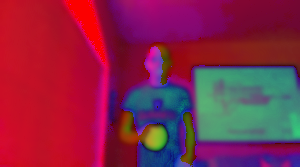

In [153]:
hsv = cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2HSV)
cv2_imshow(hsv)

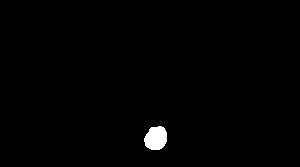

In [154]:
# We threshold the HSV image for a range of green color
# Now extract the green object alone, we can do whatever on that image we want.

greenLower = (29, 86, 6)
greenUpper = (64, 255, 255)
mask = cv2.inRange(hsv, greenLower, greenUpper)
cv2_imshow(mask)

In [155]:


cnts,hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(cnts))

1


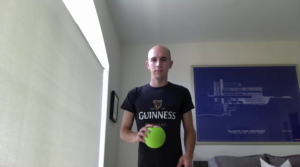

In [156]:
cv2_imshow(test)

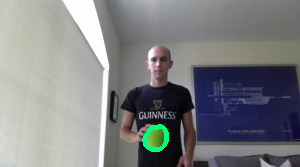

In [157]:
cv2.drawContours(test, cnts, -1, (127,255,0), 3)
cv2_imshow(test)

In [158]:
frame=cv2.imread("/content/paper.png")

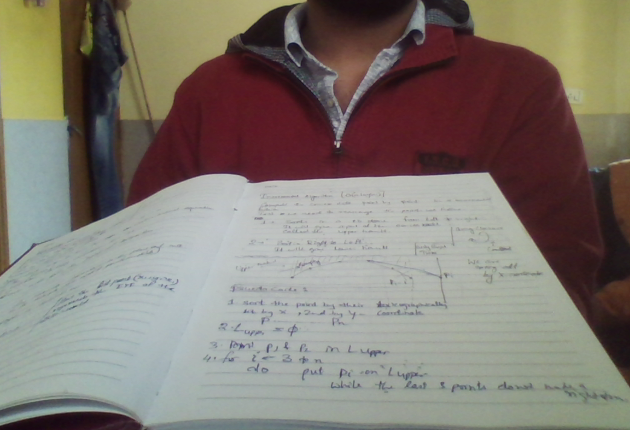

In [159]:
cv2_imshow(frame)

In [160]:
print(frame.shape)

(430, 630, 3)


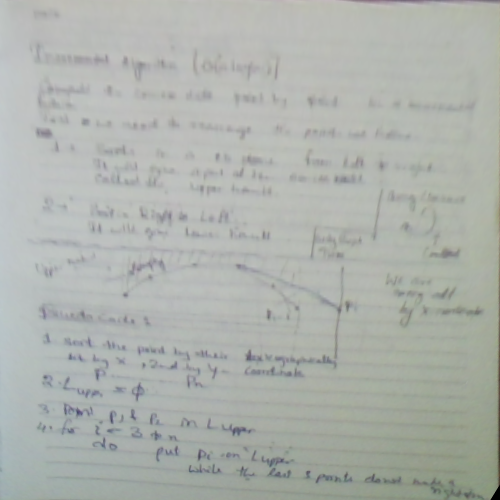

In [161]:
# pts1 = np.float32([[0, 260], [640, 260], [144, 400], [640, 400]]) 
pts1 = np.float32([[250, 184], [487, 172], [144, 422], [640, 400]]) 
pts2 = np.float32([[0, 0], [500, 0], [0, 500], [500, 500]]) 
      
    # Apply Perspective Transform Algorithm 
matrix = cv2.getPerspectiveTransform(pts1, pts2) 
result = cv2.warpPerspective(frame, matrix, (500, 500)) 
    # Wrap the transformed image 
  

cv2_imshow( result)